<a href="https://colab.research.google.com/github/EllaThomasson/labs-ds3001/blob/main/thebootstraplab_ellathomasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 6.00 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Question 2**

Part a

In [ ]:
df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

In [ ]:
(df).head(5)

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [ ]:
pd.crosstab(df['treatment'], df['breast_cancer_death'], margins=True, margins_name="Total")

breast_cancer_death,no,yes,Total
treatment,,,
control,44405,505,44910
mammogram,44425,500,44925
Total,88830,1005,89835


There is not a huge difference in in 25-year survival rates between the control and mammogram groups?There are a few more no's for mammogram and a few more yes's for control.

Part b

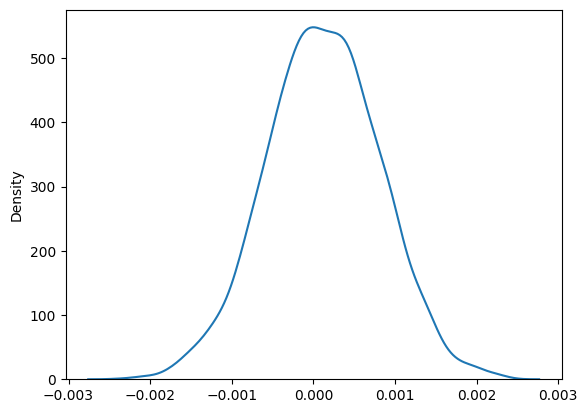

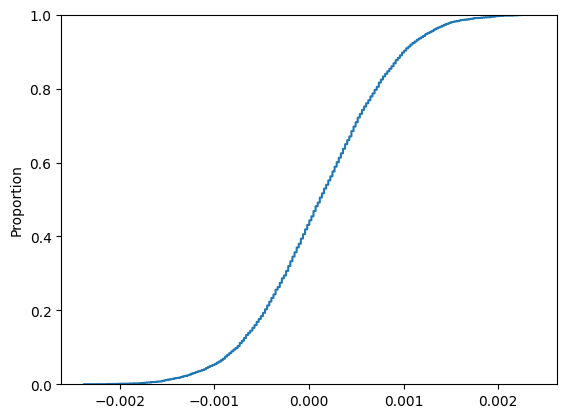

In [ ]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

Part c

In [ ]:
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% CI: (', lower_bound, ', ', upper_bound, ')' )

99% CI: ( -0.0016662365725701388 ,  0.001962842435009166 )
